In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# データフレームとして保存済みの2021~2023データを読み込む
df2001_2023 = pd.read_pickle("dataframe.pkl")

# 1.データの要約

In [3]:
# データフレームの確認
df2001_2023.shape

(1108846, 55)

In [4]:
# データフレームの確認
df2001_2023.head(7)

,年,月,日,回次,場所,日次,レース番号,レース名,クラスコード,芝・ダ,...,母の父馬名,毛色,生年月日,単勝オッズ,馬印1,レース印1,PCI,外部指数,外部指数差,外部指数順位
0,23,8,6,1,札幌,6,12,１勝ｸﾗｽ・牝,23,芝,...,マツリダゴッホ,鹿毛,200321,17.3,,,45.3,NaN,NaN,NaN
1,23,8,6,1,札幌,6,12,１勝ｸﾗｽ・牝,23,芝,...,Kingmambo,鹿毛,190325,2.0,,,52.0,NaN,NaN,NaN
2,23,8,6,1,札幌,6,12,１勝ｸﾗｽ・牝,23,芝,...,Shamardal,鹿毛,170130,22.8,,,47.2,NaN,NaN,NaN
3,23,8,6,1,札幌,6,12,１勝ｸﾗｽ・牝,23,芝,...,ドリームジャーニー,芦毛,200412,29.3,,,45.6,NaN,NaN,NaN
4,23,8,6,1,札幌,6,12,１勝ｸﾗｽ・牝,23,芝,...,クロフネ,鹿毛,200311,22.2,,,47.8,NaN,NaN,NaN
5,23,8,6,1,札幌,6,12,１勝ｸﾗｽ・牝,23,芝,...,Cape Cross,黒鹿,200227,47.6,,,45.6,NaN,NaN,NaN
6,23,8,6,1,札幌,6,12,１勝ｸﾗｽ・牝,23,芝,...,Starspangledbanner,栗毛,200410,23.2,,,50.0,NaN,NaN,NaN


In [5]:
# データフレームの確認
df2001_2023.describe()

,年,月,日,回次,日次,レース番号,クラスコード,コースコード,距離,年齢,...,賞金,血統登録番号,騎手コード,調教師コード,生年月日,単勝オッズ,PCI,外部指数,外部指数差,外部指数順位
count,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,...,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,1.108846e+06,0.0,0.0,0.0
mean,1.178672e+01,6.408190e+00,1.572297e+01,2.569709e+00,4.661119e+00,6.498869e+00,3.130207e+01,1.429838e+00,1.638142e+03,3.653402e+00,...,1.402585e+02,2.008158e+07,1.294977e+03,8.067754e+02,2.001434e+05,6.571567e+01,4.662341e+01,NaN,NaN,NaN
std,6.482087e+00,3.427360e+00,8.607448e+00,1.355386e+00,2.530583e+00,3.463191e+00,3.916163e+01,2.349440e+00,4.330378e+02,1.333009e+00,...,4.696274e+02,2.908941e+07,1.177380e+03,4.719329e+02,2.909017e+05,9.486523e+01,1.101622e+01,NaN,NaN,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,0.000000e+00,1.000000e+03,2.000000e+00,...,0.000000e+00,1.000020e+05,1.400000e+02,1.010000e+02,1.030000e+02,-5.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,6.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00,0.000000e+00,1.200000e+03,3.000000e+00,...,0.000000e+00,5.105417e+06,7.320000e+02,3.980000e+02,5.041800e+04,8.500000e+00,4.430000e+01,NaN,NaN,NaN
50%,1.200000e+01,6.000000e+00,1.600000e+01,2.000000e+00,5.000000e+00,6.000000e+00,2.300000e+01,1.000000e+00,1.600000e+03,3.000000e+00,...,0.000000e+00,1.110220e+07,1.061000e+03,1.024000e+03,1.103070e+05,2.520000e+01,4.810000e+01,NaN,NaN,NaN
75%,1.700000e+01,9.000000e+00,2.300000e+01,4.000000e+00,7.000000e+00,1.000000e+01,3.900000e+01,1.000000e+00,1.800000e+03,4.000000e+00,...,1.200000e+02,1.611009e+07,1.126000e+03,1.081000e+03,1.605280e+05,8.150000e+01,5.200000e+01,NaN,NaN,NaN
max,2.300000e+01,1.200000e+01,3.100000e+01,6.000000e+00,1.200000e+01,1.200000e+01,1.950000e+02,8.000000e+00,4.260000e+03,1.300000e+01,...,4.000000e+04,9.920005e+07,5.639000e+03,5.769000e+03,9.911080e+05,9.999000e+02,9.990000e+01,NaN,NaN,NaN


In [6]:
#列ごとのNAの数を調べる
df2001_2023.isnull().sum(axis=0)

年                    0
月                    0
日                    0
回次                   0
場所                   0
日次                   0
レース番号                0
レース名                 0
クラスコード               0
芝・ダ                  0
コースコード               0
距離                   0
馬場状態                 0
馬名                   0
性別                   0
年齢                   0
騎手名                  0
斤量                   0
頭数                   0
馬番                   0
確定着順                 0
入線着順                 0
異常コード                0
着差タイム                0
人気順                  0
走破タイム                0
走破時計                 0
Unnamed: 27          0
通過順1                 0
通過順2                 0
通過順3                 0
通過順4                 0
上がり3Fタイム             0
馬体重                  0
調教師                  0
所属地                  0
賞金                   0
血統登録番号               0
騎手コード                0
調教師コード               0
レースID                0
現馬主名                 0
生産者名                 0
父馬名        

In [7]:
#どのようなコラムがあるか表示
print(df2001_2023.columns.to_list())

['年', '月', '日', '回次', '場所', '日次', 'レース番号', 'レース名', 'クラスコード', '芝・ダ', 'コースコード', '距離', '馬場状態', '馬名', '性別', '年齢', '騎手名', '斤量', '頭数', '馬番', '確定着順', '入線着順', '異常コード', '着差タイム', '人気順', '走破タイム', '走破時計', 'Unnamed: 27', '通過順1', '通過順2', '通過順3', '通過順4', '上がり3Fタイム', '馬体重', '調教師', '所属地', '賞金', '血統登録番号', '騎手コード', '調教師コード', 'レースID', '現馬主名', '生産者名', '父馬名', '母馬名', '母の父馬名', '毛色', '生年月日', '単勝オッズ', '馬印1', 'レース印1', 'PCI', '外部指数', '外部指数差', '外部指数順位']


In [8]:
#タイム0秒のデータ（おそらく競争中止など）を削除
df2001_2023= df2001_2023[df2001_2023['走破タイム'] != 0]
df2001_2023.shape

(1099169, 55)

In [9]:
#ダート（芝ではなく土）のレースのみを抽出
dirt= df2001_2023[(df2001_2023['芝・ダ'] == 'ダ')]
dirt.shape

(555954, 55)

In [10]:
#1600mだけの傾向を参考までに
dirt1600=dirt[dirt['距離']==1600]
dirt1600.shape

(33012, 55)

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26020 (\N{CJK UNIFIED IDEOGRAPH-65A4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

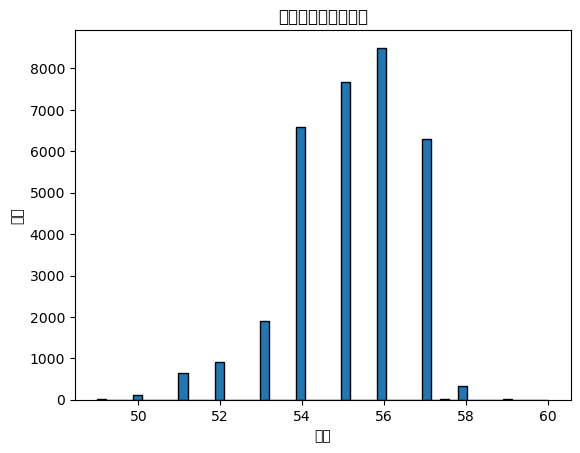

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

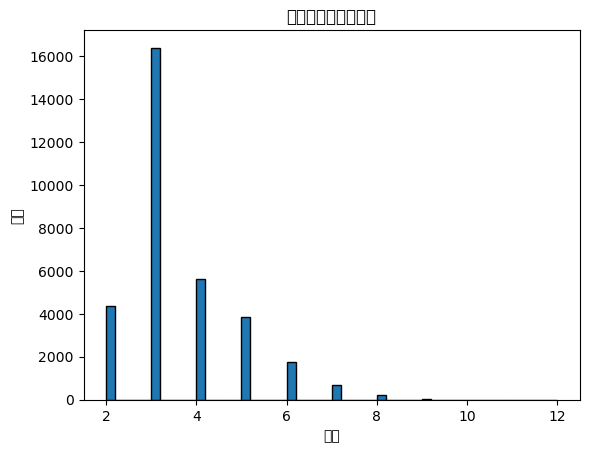

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

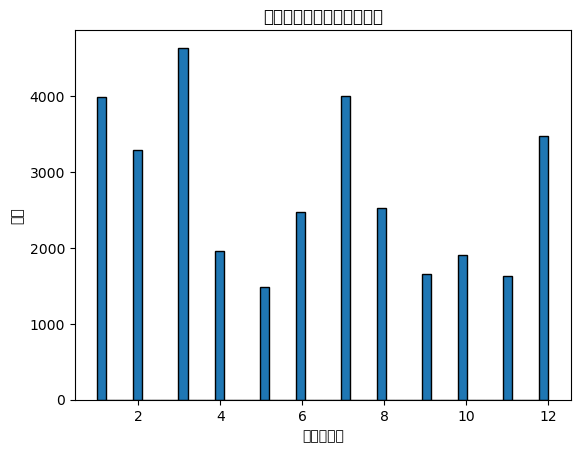

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_

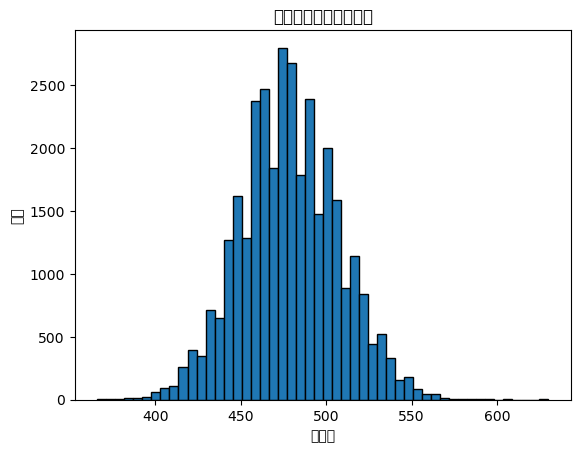

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Use

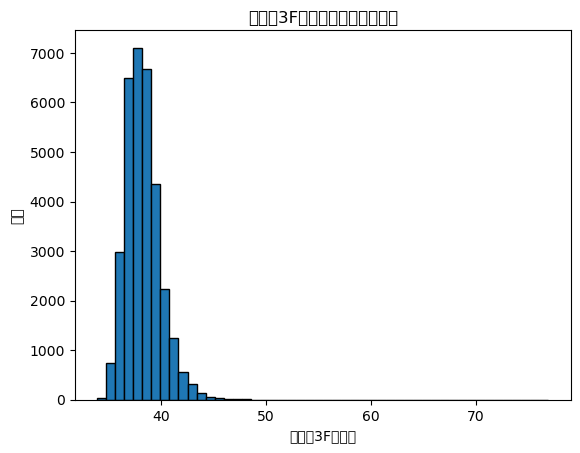

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

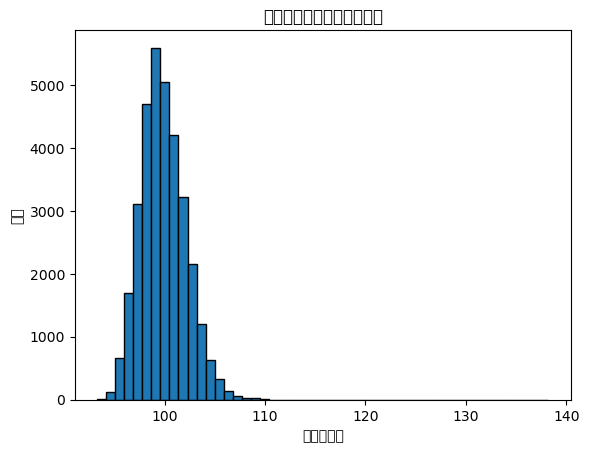

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# カラム名のリスト
columns_to_plot = ['斤量' ,'年齢','レース番号','馬体重','上がり3Fタイム', '走破タイム']

# ループで各列のヒストグラムを表示
for column in columns_to_plot:
    plt.figure()  # 新しいプロットを作成
    dirt1600[column].plot(kind='hist', bins=50, edgecolor='black')  # ヒストグラムをプロット
    plt.title(f'{column}のヒストグラム')  # グラフのタイトル
    plt.xlabel(column)  # x軸ラベル
    plt.ylabel('頻度')  # y軸ラベル
    plt.show()  # グラフを表示

タイムが正規分布に従うとして、重回帰分析ができそう。

（↑距離を1600ｍに絞ってのグラフなので、距離の違いを反映できれば）

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 26020 (\N{CJK UNIFIED IDEOGRAPH-65A4}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTE

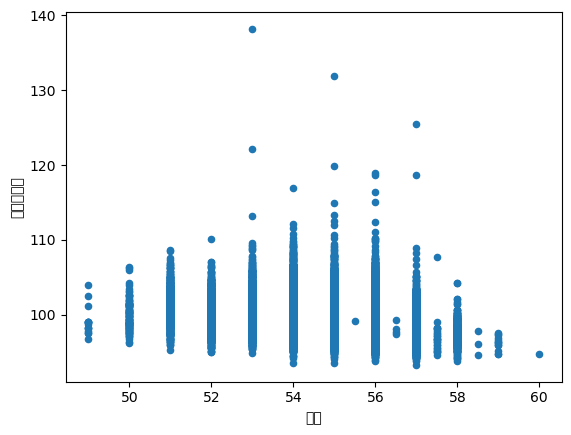

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


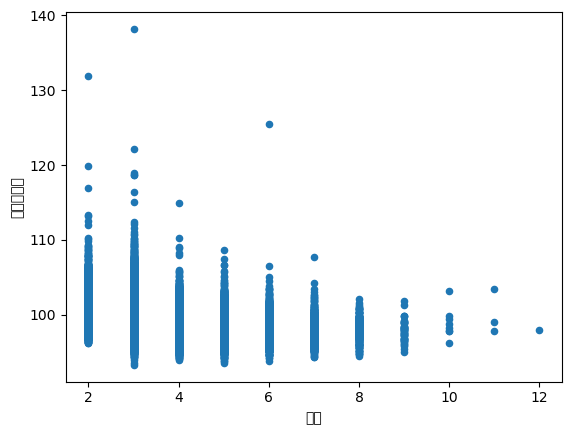

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

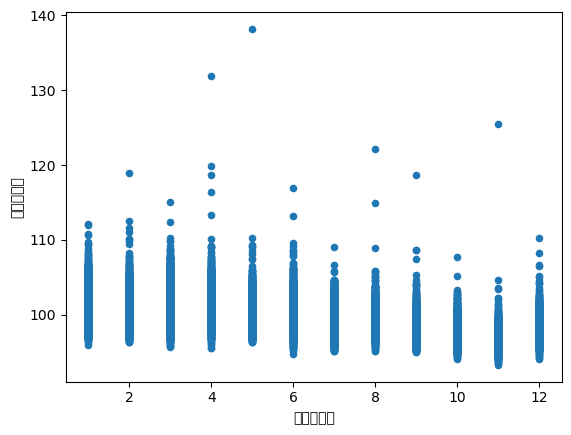

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


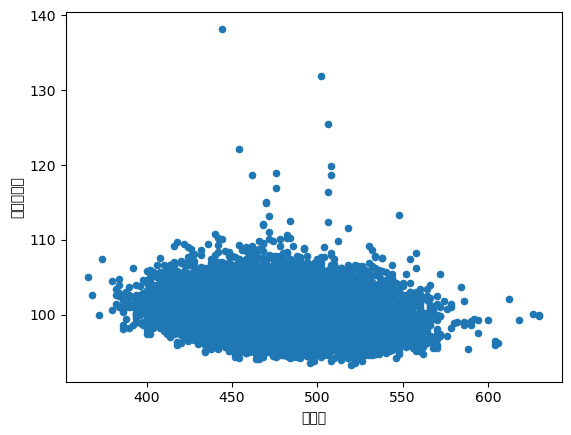

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


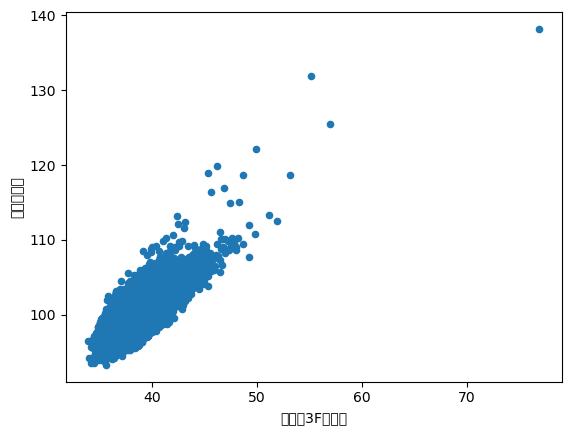

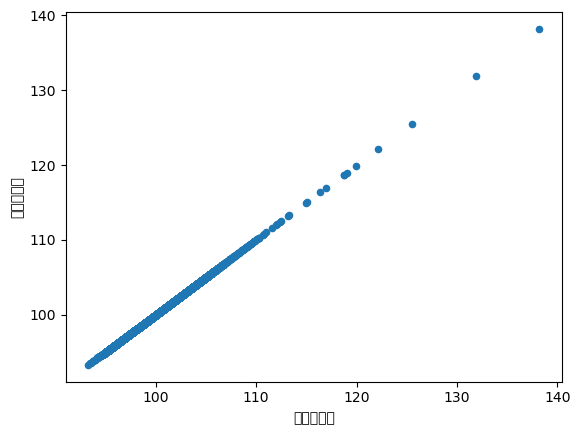

In [13]:
#相関図行列

# カラム名のリスト
columns_to_plot = ['斤量' ,'年齢','レース番号','馬体重','上がり3Fタイム', '走破タイム']
#速度と他の変数の相関行列
for name in columns_to_plot:
    dirt1600.plot(kind='scatter',x=name,y='走破タイム')

In [14]:
#相関行列を見るためだけのデータフレームを作成
columns_to_plot=['レース番号','年齢','斤量', '馬番','上がり3Fタイム','馬体重', '走破タイム']
soukan=dirt1600[columns_to_plot]
#相関行列を見る
soukan=soukan.corr()
soukan

,レース番号,年齢,斤量,馬番,上がり3Fタイム,馬体重,走破タイム
レース番号,1.000000,0.653702,0.368902,0.010855,-0.415200,0.236557,-0.577855
年齢,0.653702,1.000000,0.363249,0.022522,-0.310622,0.182678,-0.434283
斤量,0.368902,0.363249,1.000000,0.011956,-0.242727,0.340053,-0.298377
馬番,0.010855,0.022522,0.011956,1.000000,0.000168,-0.002084,-0.027257
上がり3Fタイム,-0.415200,-0.310622,-0.242727,0.000168,1.000000,-0.159392,0.792823
馬体重,0.236557,0.182678,0.340053,-0.002084,-0.159392,1.000000,-0.226657
走破タイム,-0.577855,-0.434283,-0.298377,-0.027257,0.792823,-0.226657,1.000000


In [15]:
#上記行列の、走破タイム列のみ大きい順に並べ替えてみる

#走破タイムの列だけ取り出す
soukan=soukan['走破タイム']
soukan
#走破タイムとの相関係数を絶対値準にソート
# 絶対値でシリーズをソートする
sorted_series = soukan.abs().sort_values(ascending=False)

# ソート結果を元のデータと対応させる
sorted_data = soukan.loc[sorted_series.index]

# 結果を表示
print(sorted_data)

走破タイム       1.000000
上がり3Fタイム    0.792823
レース番号      -0.577855
年齢         -0.434283
斤量         -0.298377
馬体重        -0.226657
馬番         -0.027257
Name: 走破タイム, dtype: float64


# 2.データの前処理

先程、「タイム0秒」と「芝レース」のデータを落としたところから再開

In [16]:
#障害レースを削除
dirt= dirt[dirt['コースコード'] != 3]
dirt.shape

(537822, 55)

# はずれ値処理

<Axes: xlabel='距離', ylabel='走破タイム'>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 38626 (\N{CJK UNIFIED IDEOGRAPH-96E2}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTE

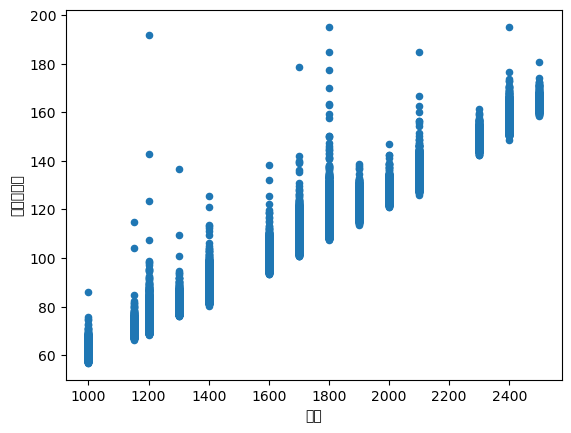

In [17]:
#横軸＝'距離'、縦軸＝'走破タイム'の散布図
dirt.plot(kind='scatter',x='距離',y='走破タイム')

In [18]:
#距離別のデータ数を表示
print(dirt["距離"].value_counts())

距離
1800    135574
1200    119625
1400     86493
1700     85833
1600     33012
1000     32282
1300      9975
1150      9721
2100      9170
1900      6552
2400      4471
2000      3672
2300       973
2500       469
Name: count, dtype: int64


In [19]:
#先ほどの情報をリストに入れる
yoko=dirt['距離'].value_counts().index.tolist()

#リストを距離が短い順にソート
import numpy as np
yoko=np.sort(yoko)
yoko

array([1000, 1150, 1200, 1300, 1400, 1600, 1700, 1800, 1900, 2000, 2100,
       2300, 2400, 2500])

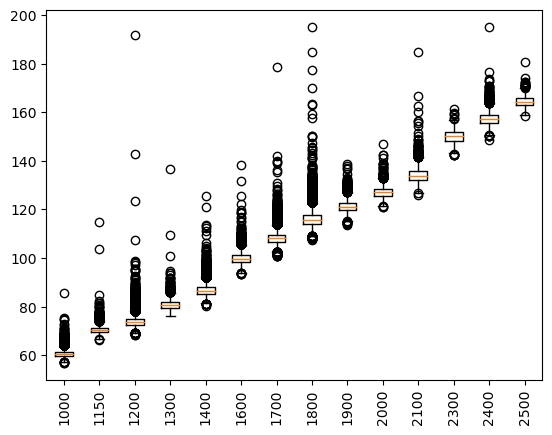

In [20]:
#並べた箱ひげ図作成
import matplotlib.pyplot as plt
import numpy as np

# 横軸と縦軸の作成
yoko = [1000, 1150, 1200, 1300, 1400, 1600, 1700, 1800, 1900, 2000, 2100,
       2300, 2400, 2500]

tate = []  # tateをリストとして明示的に初期化

for i in yoko:
    s = dirt[dirt['距離'] == i]['走破タイム'].values.tolist()
    tate.append(s)

# step3 グラフフレームの作成
fig, ax = plt.subplots()# 雑に出してみる

# step4 箱ひげ図の描画
# 一般的な箱ひげ図
ax.boxplot(tate, labels=yoko)
plt.xticks(rotation=90)
plt.show()

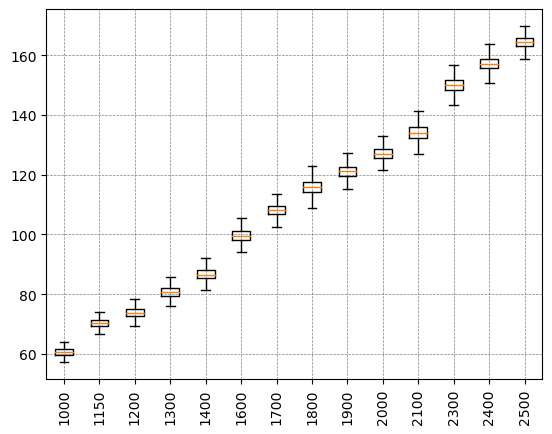

In [21]:
# step3 グラフフレームの作成
fig, ax = plt.subplots()# 雑に出してみる

# step4 箱ひげ図の描画
# 一般的な箱ひげ図
# 外れ値を除外してボックスプロットを描画
ax.boxplot(tate, labels=yoko, showfliers=False)
plt.xticks(rotation=90)  # X軸のラベルを縦向きに設定
# 罫線を追加（線の色を薄いグレー、スタイルを点線に設定）
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.show()

<Axes: title={'center': 'ダート1000ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

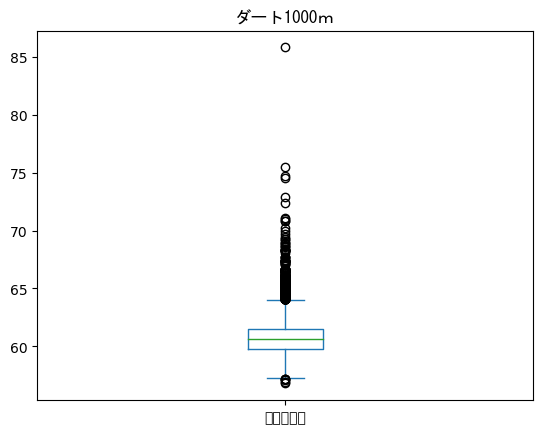

In [35]:
#上の箱ひげ図の「距離1000ｍ」のみ表示
dirt1000=dirt[dirt['距離'] == 1000]['走破タイム']
plt.title('ダート1000ｍ',fontname="MS Gothic")
dirt1000.plot.box()

ひげの下側は、除外すべきでないと判断。

（遅すぎる場合はレース途中での骨折などアクシデントが想定されるが、早すぎる場合はなく、はずれ具合もギリギリなので）

In [36]:
#データフレームの、距離1000ｍの時の外れ値（min～目視）を除外する
mi=dirt1000.min() #最小値
dirt1000_higecut = dirt.loc[(dirt['距離'] == 1000) & (dirt['走破タイム'].between(mi,70)

SyntaxError: incomplete input (3812978283.py, line 3)

<Axes: title={'center': 'ダート1150ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

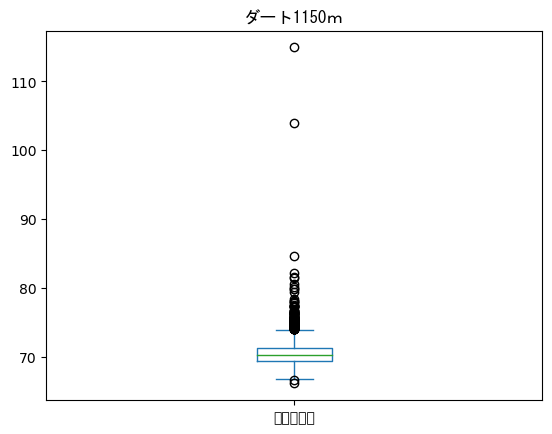

In [33]:
#上の箱ひげ図の「距離1150ｍ」のみ表示
dirt1150=dirt[dirt['距離'] == 1150]['走破タイム']
plt.title('ダート1150ｍ',fontname="MS Gothic")
dirt1150.plot.box()

In [39]:
#同様に距離1150ｍの場合も外れ値処理
dirt1150=dirt[dirt['距離'] == 1150]['走破タイム']
q3=np.percentile(dirt1150,75)
q1=np.percentile(dirt1150,25)
mi=dirt1150.min()
dirt1150_higecut = dirt.loc[(dirt['距離'] == 1150) & (dirt['走破タイム'].between(mi,79))]
print("処理前の件数：",len(dirt1150))
print("処理後の件数：",len(dirt1150_higecut))

処理前の件数： 9721
処理後の件数： 9710


<Axes: title={'center': 'ダート1200ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

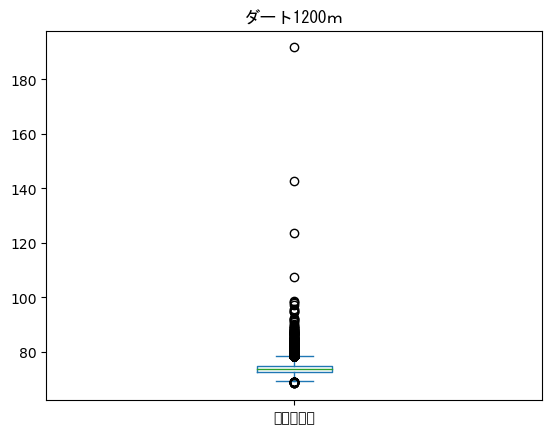

In [40]:
#上の箱ひげ図の「距離1200ｍ」のみ表示
dirt1200=dirt[dirt['距離'] == 1200]['走破タイム']
plt.title('ダート1200ｍ',fontname="MS Gothic")
dirt1200.plot.box()

In [41]:
#同様に距離1200ｍの場合も外れ値処理
dirt1200=dirt[dirt['距離'] == 1200]['走破タイム']
q3=np.percentile(dirt1200,75)
q1=np.percentile(dirt1200,25)
mi=dirt1200.min()
dirt1200_higecut = dirt.loc[(dirt['距離'] == 1200) & (dirt['走破タイム'].between(mi, 90))]
print("処理前の件数：",len(dirt1200))
print("処理後の件数：",len(dirt1200_higecut))

処理前の件数： 119625
処理後の件数： 119605


<Axes: title={'center': 'ダート1300ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

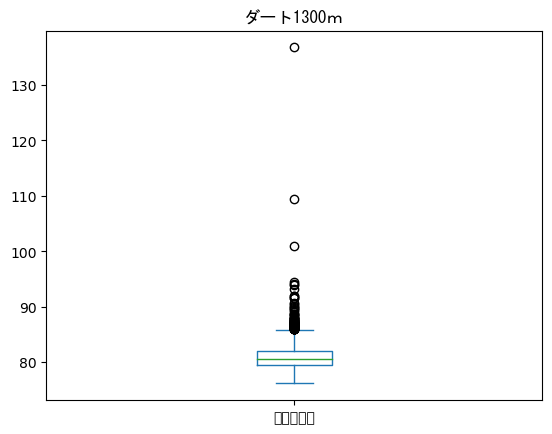

In [42]:
#上の箱ひげ図の「距離1300ｍ」のみ表示
dirt1300=dirt[dirt['距離'] == 1300]['走破タイム']
plt.title('ダート1300ｍ',fontname="MS Gothic")
dirt1300.plot.box()

In [43]:
#同様に距離1300ｍの場合も外れ値処理
dirt1300=dirt[dirt['距離'] == 1300]['走破タイム']
q3=np.percentile(dirt1300,75)
q1=np.percentile(dirt1300,25)
mi=dirt1300.min()
dirt1300_higecut = dirt.loc[(dirt['距離'] == 1300) & (dirt['走破タイム'].between(mi, 90))]
print("処理前の件数：",len(dirt1300))
print("処理後の件数：",len(dirt1300_higecut))

処理前の件数： 9975
処理後の件数： 9961


<Axes: title={'center': 'ダート1400ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

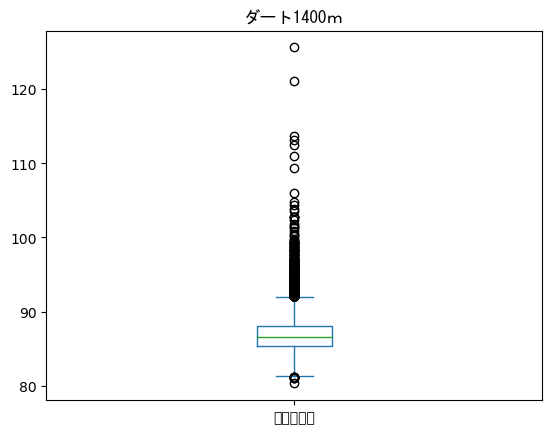

In [44]:
#上の箱ひげ図の「距離1400ｍ」のみ表示
dirt1400=dirt[dirt['距離'] == 1400]['走破タイム']
plt.title('ダート1400ｍ',fontname="MS Gothic")
dirt1400.plot.box()

In [45]:
#同様に距離1400ｍの場合も外れ値処理
dirt1400=dirt[dirt['距離'] == 1400]['走破タイム']
q3=np.percentile(dirt1400,75)
q1=np.percentile(dirt1400,25)
mi=dirt1400.min()
dirt1400_higecut = dirt.loc[(dirt['距離'] == 1400) & (dirt['走破タイム'].between(mi, 99))]
print("処理前の件数：",len(dirt1400))
print("処理後の件数：",len(dirt1400_higecut))

処理前の件数： 86493
処理後の件数： 86459


<Axes: title={'center': 'ダート1600ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

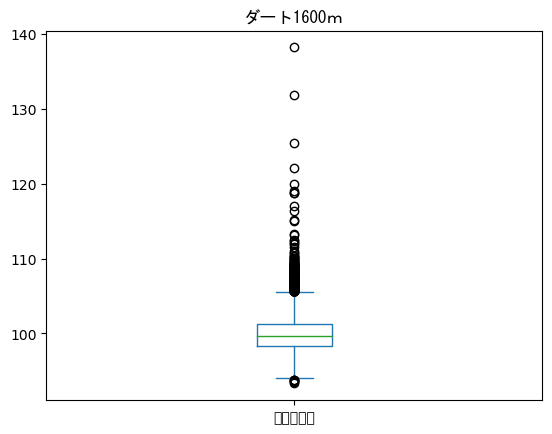

In [46]:
#上の箱ひげ図の「距離1600ｍ」のみ表示
dirt1600=dirt[dirt['距離'] == 1600]['走破タイム']
plt.title('ダート1600ｍ',fontname="MS Gothic")
dirt1600.plot.box()

In [47]:
#同様に距離1600ｍの場合も外れ値処理
dirt1600=dirt[dirt['距離'] == 1600]['走破タイム']
q3=np.percentile(dirt1600,75)
q1=np.percentile(dirt1600,25)
mi=dirt1600.min()
dirt1600_higecut = dirt.loc[(dirt['距離'] == 1600) & (dirt['走破タイム'].between(mi, 110))]
print("処理前の件数：",len(dirt1600))
print("処理後の件数：",len(dirt1600_higecut))

処理前の件数： 33012
処理後の件数： 32984


<Axes: title={'center': 'ダート1700ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

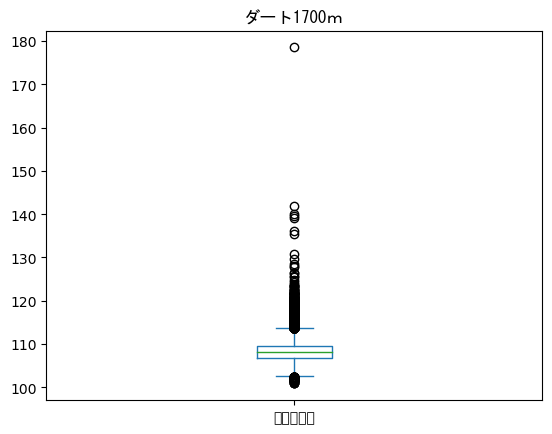

In [48]:
#上の箱ひげ図の「距離1700ｍ」のみ表示
dirt1700=dirt[dirt['距離'] == 1700]['走破タイム']
plt.title('ダート1700ｍ',fontname="MS Gothic")
dirt1700.plot.box()

In [49]:
#同様に距離1700ｍの場合も外れ値処理
dirt1700=dirt[dirt['距離'] == 1700]['走破タイム']
q3=np.percentile(dirt1700,75)
q1=np.percentile(dirt1700,25)
mi=dirt1700.min()
dirt1700_higecut = dirt.loc[(dirt['距離'] == 1700) & (dirt['走破タイム'].between(mi, 123))]
print("処理前の件数：",len(dirt1700))
print("処理後の件数：",len(dirt1700_higecut))

処理前の件数： 85833
処理後の件数： 85809


<Axes: title={'center': 'ダート1800ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

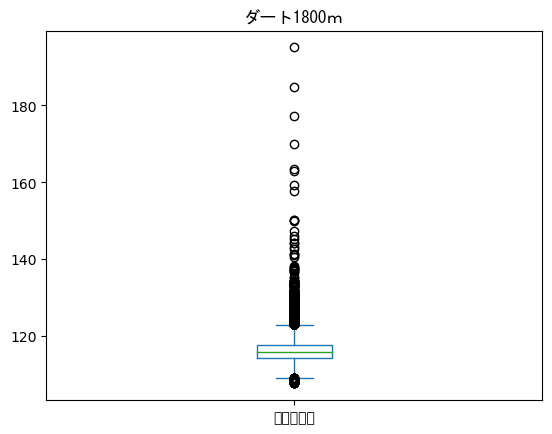

In [50]:
#上の箱ひげ図の「距離1800ｍ」のみ表示
dirt1800=dirt[dirt['距離'] == 1800]['走破タイム']
plt.title('ダート1800ｍ',fontname="MS Gothic")
dirt1800.plot.box()

In [51]:
#同様に距離1800ｍの場合も外れ値処理
dirt1800=dirt[dirt['距離'] == 1800]['走破タイム']
q3=np.percentile(dirt1800,75)
q1=np.percentile(dirt1800,25)
mi=dirt1800.min()
dirt1800_higecut = dirt.loc[(dirt['距離'] == 1800) & (dirt['走破タイム'].between(mi,135))]
print("処理前の件数：",len(dirt1800))
print("処理後の件数：",len(dirt1800_higecut))

処理前の件数： 135574
処理後の件数： 135541


<Axes: title={'center': 'ダート1900ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

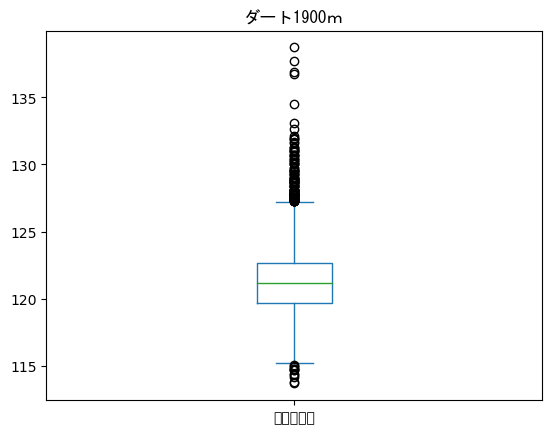

In [52]:
#上の箱ひげ図の「距離1900ｍ」のみ表示
dirt1900=dirt[dirt['距離'] == 1900]['走破タイム']
plt.title('ダート1900ｍ',fontname="MS Gothic")
dirt1900.plot.box()

In [53]:
#同様に距離1900ｍの場合も外れ値処理
dirt1900=dirt[dirt['距離'] == 1900]['走破タイム']
q3=np.percentile(dirt1900,75)
q1=np.percentile(dirt1900,25)
mi=dirt1900.min()
dirt1900_higecut = dirt.loc[(dirt['距離'] == 1900) & (dirt['走破タイム'].between(mi,130))]
print("処理前の件数：",len(dirt1900))
print("処理後の件数：",len(dirt1900_higecut))

処理前の件数： 6552
処理後の件数： 6521


<Axes: title={'center': 'ダート2000ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

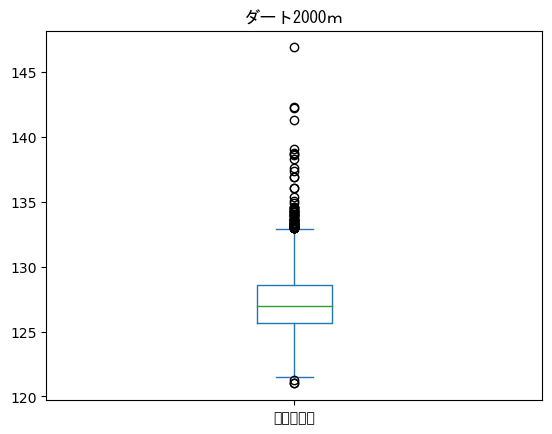

In [54]:
#上の箱ひげ図の「距離2000ｍ」のみ表示
dirt2000=dirt[dirt['距離'] == 2000]['走破タイム']
plt.title('ダート2000ｍ',fontname="MS Gothic")
dirt2000.plot.box()

In [55]:
#同様に距離2000ｍの場合も外れ値処理
dirt2000=dirt[dirt['距離'] == 2000]['走破タイム']
q3=np.percentile(dirt2000,75)
q1=np.percentile(dirt2000,25)
mi=dirt2000.min()
dirt2000_higecut = dirt.loc[(dirt['距離'] == 2000) & (dirt['走破タイム'].between(mi, 134))]
print("処理前の件数：",len(dirt2000))
print("処理後の件数：",len(dirt2000_higecut))

処理前の件数： 3672
処理後の件数： 3641


<Axes: title={'center': 'ダート2100ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

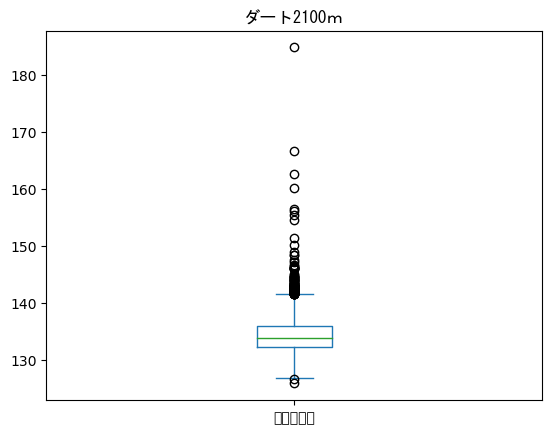

In [56]:
#上の箱ひげ図の「距離2100ｍ」のみ表示
dirt2100=dirt[dirt['距離'] == 2100]['走破タイム']
plt.title('ダート2100ｍ',fontname="MS Gothic")
dirt2100.plot.box()

In [57]:
#同様に距離2100ｍの場合も外れ値処理
dirt2100=dirt[dirt['距離'] == 2100]['走破タイム']
q3=np.percentile(dirt2100,75)
q1=np.percentile(dirt2100,25)
mi=dirt2100.min()
dirt2100_higecut = dirt.loc[(dirt['距離'] == 2100) & (dirt['走破タイム'].between(mi, 145.5))]
print("処理前の件数：",len(dirt2100))
print("処理後の件数：",len(dirt2100_higecut))

処理前の件数： 9170
処理後の件数： 9146


<Axes: title={'center': 'ダート2300ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

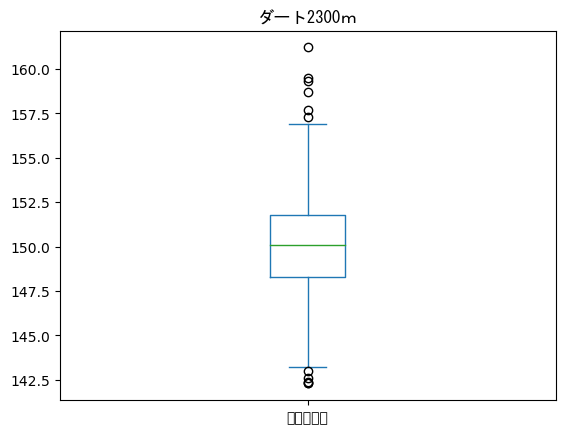

In [58]:
#上の箱ひげ図の「距離2000ｍ」のみ表示
dirt2300=dirt[dirt['距離'] == 2300]['走破タイム']
plt.title('ダート2300ｍ',fontname="MS Gothic")
dirt2300.plot.box()

In [59]:
#同様に距離2300ｍの場合も外れ値処理
dirt2300=dirt[dirt['距離'] == 2300]['走破タイム']
q3=np.percentile(dirt2300,75)
q1=np.percentile(dirt2300,25)
mi=dirt2300.min()
dirt2300_higecut = dirt.loc[(dirt['距離'] == 2300) & (dirt['走破タイム'].between(mi, 157))]
print("処理前の件数：",len(dirt2300))
print("処理後の件数：",len(dirt2300_higecut))

処理前の件数： 973
処理後の件数： 967


<Axes: title={'center': 'ダート2400ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

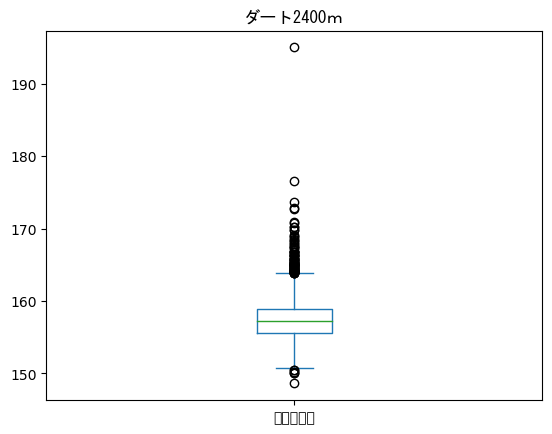

In [60]:
#上の箱ひげ図の「距離2400ｍ」のみ表示
dirt2400=dirt[dirt['距離'] == 2400]['走破タイム']
plt.title('ダート2400ｍ',fontname="MS Gothic")
dirt2400.plot.box()

In [61]:
#同様に距離2400ｍの場合も外れ値処理
dirt2400=dirt[dirt['距離'] == 2400]['走破タイム']
q3=np.percentile(dirt2400,75)
q1=np.percentile(dirt2400,25)
mi=dirt2400.min()
dirt2400_higecut = dirt.loc[(dirt['距離'] == 2400) & (dirt['走破タイム'].between(mi, 169))]
print("処理前の件数：",len(dirt2400))
print("処理後の件数：",len(dirt2400_higecut))

処理前の件数： 4471
処理後の件数： 4459


<Axes: title={'center': 'ダート2500ｍ'}>

C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 30772 (\N{CJK UNIFIED IDEOGRAPH-7834}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  func(*args, **kwargs)
C:\Users\newpc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70

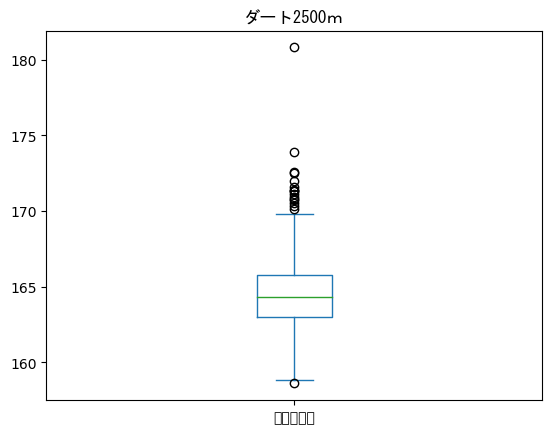

In [62]:
#上の箱ひげ図の「距離2500ｍ」のみ表示
dirt2500=dirt[dirt['距離'] == 2500]['走破タイム']
plt.title('ダート2500ｍ',fontname="MS Gothic")
dirt2500.plot.box()

In [63]:
#同様に距離2500ｍの場合も外れ値処理
dirt2500=dirt[dirt['距離'] == 2500]['走破タイム']
q3=np.percentile(dirt2500,75)
q1=np.percentile(dirt2500,25)
mi=dirt2500.min()
dirt2500_higecut = dirt.loc[(dirt['距離'] == 2500) & (dirt['走破タイム'].between(mi, 171))]
print("処理前の件数：",len(dirt2500))
print("処理後の件数：",len(dirt2500_higecut))

処理前の件数： 469
処理後の件数： 459


In [64]:
#先ほど作った外れ値処理データを結合する
df2001_2023_higecut=pd.concat([dirt1000_higecut,
                               dirt1150_higecut, 
                               dirt1200_higecut, 
                               dirt1300_higecut, 
                               dirt1400_higecut, 
                               dirt1600_higecut, 
                               dirt1700_higecut, 
                               dirt1800_higecut, 
                               dirt1900_higecut, 
                               dirt2000_higecut, 
                               dirt2100_higecut,
                               dirt2300_higecut,
                               dirt2400_higecut, 
                               dirt2500_higecut,], axis=0, ignore_index=True)

In [65]:
#結合したデータを確認
df2001_2023_higecut.info

<bound method DataFrame.info of          年  月  日  回次  場所  日次  レース番号   レース名  クラスコード 芝・ダ  ...      母の父馬名  毛色  \
0       23  8  6   1  札幌   6      7  １勝ｸﾗｽ      23   ダ  ...  サンデーサイレンス  黒鹿   
1       23  8  6   1  札幌   6      7  １勝ｸﾗｽ      23   ダ  ...    ダイワメジャー  黒鹿   
2       23  8  6   1  札幌   6      7  １勝ｸﾗｽ      23   ダ  ...  スペシャルウィーク  鹿毛   
3       23  8  6   1  札幌   6      7  １勝ｸﾗｽ      23   ダ  ...  ブライアンズタイム  鹿毛   
4       23  8  6   1  札幌   6      7  １勝ｸﾗｽ      23   ダ  ...     ケイムホーム  黒鹿   
...     .. .. ..  ..  ..  ..    ...    ...     ...  ..  ...        ...  ..   
537528   8  1  6   1  中山   2      4  500万下      23   ダ  ...  サンデーサイレンス  鹿毛   
537529   8  1  6   1  中山   2      4  500万下      23   ダ  ...  マーベラスサンデー  栗毛   
537530   8  1  6   1  中山   2      4  500万下      23   ダ  ...   Caerleon  栗毛   
537531   8  1  6   1  中山   2      4  500万下      23   ダ  ...   Caerleon  鹿毛   
537532   8  1  6   1  中山   2      4  500万下      23   ダ  ...    ロイヤルスキー  栗毛   

          生年月日  単勝オッズ 馬印1  レース印

In [66]:
yoko = [1000, 1150, 1200, 1300, 1400, 1600, 1700, 1800, 1900, 2000, 2100,
       2300, 2400, 2500]

In [67]:
#はずれ値処理後のデータ数を計算
print(len(dirt1000_higecut)
+len(dirt1150_higecut)
+len(dirt1200_higecut)
+len(dirt1300_higecut)
+len(dirt1400_higecut)
+len(dirt1600_higecut)
+len(dirt1700_higecut)
+len(dirt1800_higecut)
+len(dirt1900_higecut)
+len(dirt2000_higecut)
+len(dirt2100_higecut)
+len(dirt2300_higecut)
+len(dirt2400_higecut) 
+len(dirt2500_higecut))

537533


In [68]:
#はずれ値処理前のデータ数
len(dirt)

537822

In [71]:
#はずれ値のデータ数
537822-537533

289

In [72]:
#はずれ値の割合（％）
289/555954*100

0.05198271799465423

In [73]:
# データフレームをpickleファイルとして保存
df2001_2023_higecut.to_pickle('df2001_2023_higecut0218.pkl')

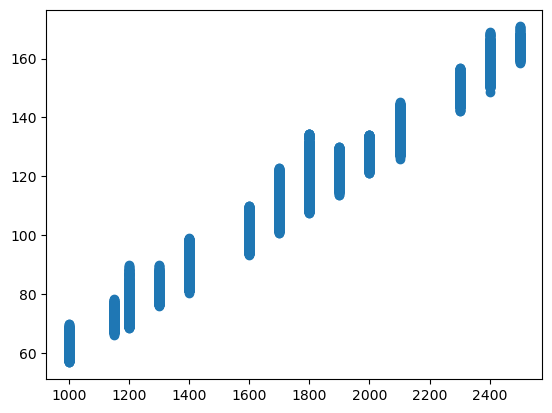

In [74]:
#外れ値処理後のグラフ
import matplotlib.pyplot as plt

# 距離と走破タイムの関係を散布図で表示
plt.scatter(x=df2001_2023_higecut['距離'], y=df2001_2023_higecut['走破タイム'])

# グラフを表示
plt.show()